In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import scipy.stats as scs

%matplotlib inline
plt.style.use('fivethirtyeight')

import calendar

In [2]:
import geojson # or import geojson
with open("SFMTA Bikeway Network.geojson") as json_file:
    json_data = geojson.load(json_file) # or geojson.load(json_file)


 

In [3]:
df = pd.read_csv('data/lyft/trips4.csv', index_col = 0, parse_dates = ['start_time', 'end_time'])
indexes = df.loc[df['start_station_id'] == df['end_station_id']].index
df.drop(indexes, inplace=True)


df['hour'] = df['start_time'].apply(lambda x: x.hour + x.minute/60)

df['day'] = df['start_time'].apply(lambda x: x.weekday())
df['day'] = df['day'].apply(lambda x: calendar.day_name[x])

df['month'] = df['start_time'].apply(lambda x: x.month)
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

df['velocity'] = (df['bicycle_distance']/1609.34) / (df['duration_sec']/3600)

df['bicycle_duration_difference'] = df['duration_sec'] - df['bicycle_duration']
df['bicycle_estimate_velocity'] = (df['bicycle_distance']/1609.34) / (df['bicycle_duration']/3600)




/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
len(df)

2963389

In [5]:
short = df.loc[df['bicycle_duration'] < df['transit_duration']]
long = df.loc[df['bicycle_duration'] > df['transit_duration']]

short2 = short[['station1','station2','duration_sec','bicycle_distance']].groupby(["station1","station2"]).mean()
long2 = long[['station1','station2','duration_sec','bicycle_distance']].groupby(["station1","station2"]).mean()

In [6]:
faster = df.loc[df['duration_sec'] > df['bicycle_duration']]
slower = df.loc[df['duration_sec'] < df['bicycle_duration']]

In [7]:
# people are faster during morning rush hour (6-10) than evening home (16-20)
morning = [6,7,8,9,10]
evening = [16,17,18,19,20]
not_commute = [1,2,3,4,5,11,12,13,14,15,21,22,23,24]

morning_commute = df.loc[df['hour'] >= 6]
morning_commute = morning_commute.loc[morning_commute['hour'] <= 10]
evening_commute = df.loc[df['hour'] >= 16]
evening_commute = evening_commute.loc[evening_commute['hour'] <= 20]

In [8]:

stations = pd.read_csv('data/lyft/sf_stations.csv').drop(columns=['Unnamed: 0','region_id'])


In [9]:


stations['departures'] = stations['station_id'].apply(lambda x: len(df.loc[df['start_station_id'] == x]))
stations['arrivals'] = stations['station_id'].apply(lambda x: len(df.loc[df['end_station_id'] == x]))
stations['total_use'] = stations['departures']+stations['arrivals']

                                 
##avg trip lenght,avg trip distance, distance from most used area

In [11]:
def calc_trips_between(station1, station2):
    
    value1 = sum(df.loc[df['start_station_id'] == station1]['end_station_id'] == station2)
    value2 =sum(df.loc[df['start_station_id'] == station2]['end_station_id'] == station1)
    return value1 + value2
    

  


In [12]:
stations.sort_values(by='total_use', ascending = False).head(10)
    

,short_name,capacity,station_id,lon,lat,name,departures,arrivals,total_use
25,SF-J29,19,30,-122.395282,37.776598,San Francisco Caltrain (Townsend St at 4th St),76877,97320,174197
11,SF-E29-1,38,15,-122.394203,37.795392,San Francisco Ferry Building (Harry Bridges Pl...,80618,89196,169814
65,SF-K29-1,35,81,-122.393170,37.775880,Berry St at 4th St,76643,77399,154042
46,SF-J23-1,31,58,-122.417385,37.776619,Market St at 10th St,74860,76488,151348
16,SF-F28-2,39,21,-122.400811,37.789625,Montgomery St BART Station (Market St at 2nd St),67505,82144,149649
0,SF-G27,35,3,-122.404904,37.786375,Powell St BART Station (Market St at 4th St),65938,70176,136114
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,61076,73208,134284
12,SF-E29-2,23,16,-122.394430,37.794130,Steuart St at Market St,61965,61930,123895
17,SF-F29,27,22,-122.394643,37.789756,Howard St at Beale St,57829,52642,110471
2,SF-H26,35,5,-122.408445,37.783899,Powell St BART Station (Market St at 5th St),53453,55721,109174


In [13]:
stations.sort_values(by='departures', ascending = False).head(10)

,short_name,capacity,station_id,lon,lat,name,departures,arrivals,total_use
11,SF-E29-1,38,15,-122.394203,37.795392,San Francisco Ferry Building (Harry Bridges Pl...,80618,89196,169814
25,SF-J29,19,30,-122.395282,37.776598,San Francisco Caltrain (Townsend St at 4th St),76877,97320,174197
65,SF-K29-1,35,81,-122.393170,37.775880,Berry St at 4th St,76643,77399,154042
46,SF-J23-1,31,58,-122.417385,37.776619,Market St at 10th St,74860,76488,151348
16,SF-F28-2,39,21,-122.400811,37.789625,Montgomery St BART Station (Market St at 2nd St),67505,82144,149649
0,SF-G27,35,3,-122.404904,37.786375,Powell St BART Station (Market St at 4th St),65938,70176,136114
12,SF-E29-2,23,16,-122.394430,37.794130,Steuart St at Market St,61965,61930,123895
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,61076,73208,134284
17,SF-F29,27,22,-122.394643,37.789756,Howard St at Beale St,57829,52642,110471
2,SF-H26,35,5,-122.408445,37.783899,Powell St BART Station (Market St at 5th St),53453,55721,109174


In [14]:
stations.sort_values(by='arrivals', ascending = False).head(10)

,short_name,capacity,station_id,lon,lat,name,departures,arrivals,total_use
25,SF-J29,19,30,-122.395282,37.776598,San Francisco Caltrain (Townsend St at 4th St),76877,97320,174197
11,SF-E29-1,38,15,-122.394203,37.795392,San Francisco Ferry Building (Harry Bridges Pl...,80618,89196,169814
16,SF-F28-2,39,21,-122.400811,37.789625,Montgomery St BART Station (Market St at 2nd St),67505,82144,149649
65,SF-K29-1,35,81,-122.393170,37.775880,Berry St at 4th St,76643,77399,154042
46,SF-J23-1,31,58,-122.417385,37.776619,Market St at 10th St,74860,76488,151348
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,61076,73208,134284
0,SF-G27,35,3,-122.404904,37.786375,Powell St BART Station (Market St at 4th St),65938,70176,136114
12,SF-E29-2,23,16,-122.394430,37.794130,Steuart St at Market St,61965,61930,123895
2,SF-H26,35,5,-122.408445,37.783899,Powell St BART Station (Market St at 5th St),53453,55721,109174
17,SF-F29,27,22,-122.394643,37.789756,Howard St at Beale St,57829,52642,110471


In [15]:
mean_real_duration = np.mean(df['duration_sec']) 
mean_google_bicycle_duration = np.mean(df['bicycle_duration'])
mean_google_transit_duration = np.mean(df['transit_duration'])

sd_real_duration = np.std(df['duration_sec']) 
sd_google_bicycle_duration = np.std(df['bicycle_duration'])
sd_google_transit_duration = np.std(df['transit_duration'])


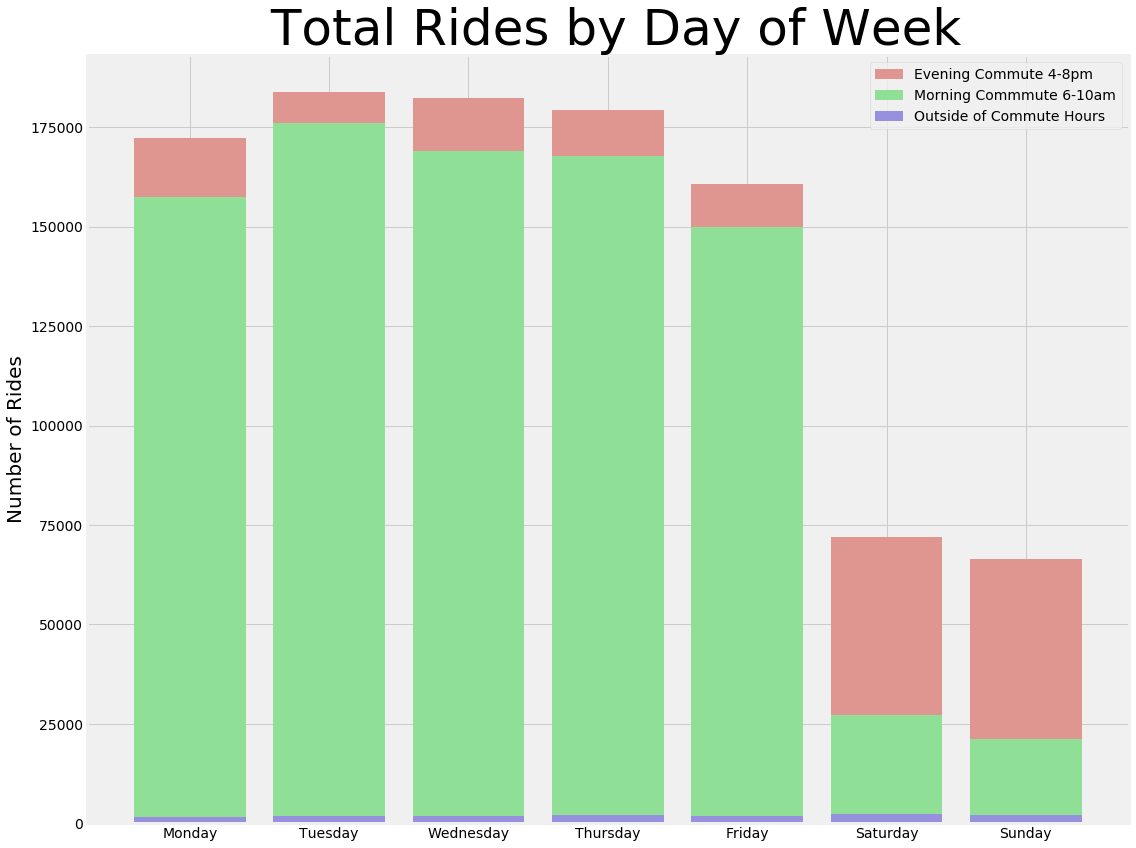

In [108]:
fig, ax = plt.subplots(1, figsize = (16,12), facecolor = 'white')
C1 = '#9690DF'
C2 = '#DF9690'
C3 = '#90DF96'

days= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

temp = df.loc[df['hour'].isin(not_commute)]

for d in days[:1]:
    ax.bar(d,len(evening_commute.loc[evening_commute['day'] == d]), color = C2, label = "Evening Commute 4-8pm")
    

for d in days[:1]:
    ax.bar(d,len(morning_commute.loc[morning_commute['day'] == d]), color = C3, label = "Morning Commmute 6-10am")
    
for d in days[:1]:
    ax.bar(d,len(temp.loc[temp['day'] == d]), color = C1, label = "Outside of Commute Hours")

for d in days[1:]:
    ax.bar(d,len(evening_commute.loc[evening_commute['day'] == d]), color = C2)
    

for d in days[1:]:
    ax.bar(d,len(morning_commute.loc[morning_commute['day'] == d]), color = C3)
    
for d in days[1:]:
    ax.bar(d,len(temp.loc[temp['day'] == d]), color = C1)


ax.set_ylabel('Number of Rides', fontsize= 20)
ax.set_title(' Total Rides by Day of Week', fontsize=50)
fig.tight_layout()
ax.legend()

plt.savefig('Days.png')

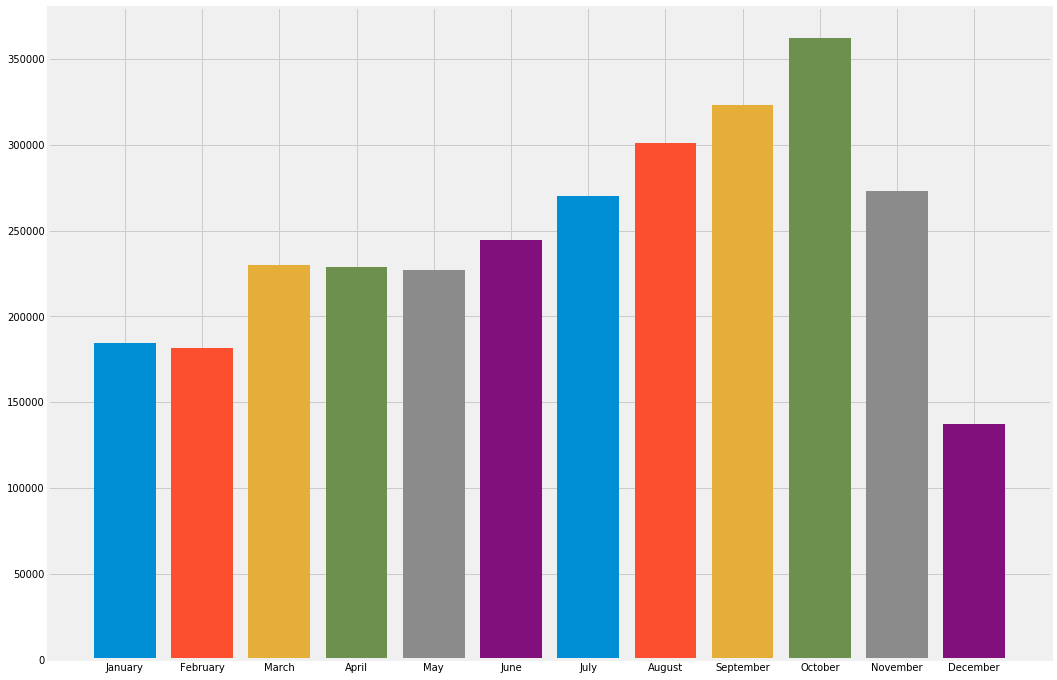

In [21]:
fig, ax = plt.subplots(1, figsize = (16,12), facecolor = 'white')

months= ['January','February','March','April','May','June',"July","August","September","October","November","December"]


for m in months:
    len(df.loc[df['month'] == 'm'])
    ax.bar(m,len(df.loc[df['month'] == m]))

In [22]:
def plot_connection(ax, station1, station2):
    station1_lat = float(stations.loc[stations['station_id'] == station1]['lat'])
    station1_lon = float(stations.loc[stations['station_id'] == station1]['lon'])
    station2_lat = float(stations.loc[stations['station_id'] == station2]['lat'])
    station2_lon = float(stations.loc[stations['station_id'] == station2]['lon'])
    
    
    plt.plot([station1_lon,station2_lon],[station1_lat,station2_lat], alpha = 0.2)
    
    

In [10]:
poly = []
for i in json_data['features']:
    temp = i.get('geometry')
    temp = temp.get("coordinates")
    poly.append(temp)

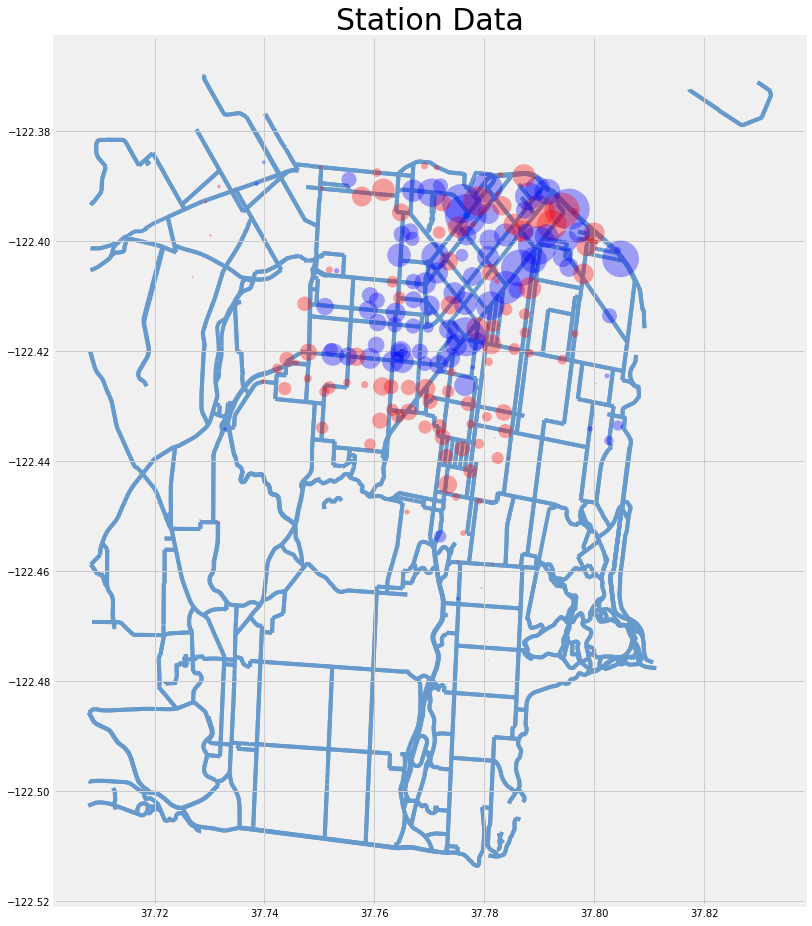

In [19]:
fig, ax = plt.subplots(figsize=(20,16))


    
from descartes import PolygonPatch
BLUE = '#6699cc'

scatter = ax.scatter(37.77659,-122.395282)

for s in stations['station_id']:
    lat = stations.loc[stations['station_id'] == s]['lat']
    lon = stations.loc[stations['station_id'] == s]['lon']
    
    arrivals = int(stations.loc[stations['station_id'] == s]['arrivals'])
    departures = int(stations.loc[stations['station_id'] == s]['departures'])
    total = int(stations.loc[stations['station_id'] == s]['total_use'])
    
    if arrivals > departures:
        color = 'blue'
        label = 'More Arrivals'
    else: 
        color = 'red'
        label = 'More Departures'
    
    

    scale = 0.01 * total
    ax.scatter(lat, lon, edgecolors='none', c=color,s=scale, zorder=1, alpha = 0.35)
    



for p in poly:
    lat = [i for i,j in p]
    lon = [j for i,j in p]
    
    ax.plot(lon,lat, color = BLUE, zorder = 0)
    ax.axis('scaled')
    

#legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Arrivals/Departures")
#ax.add_artist(legend1)

#produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
ax.set_title("Station Data", fontsize =30)


#ax.set_ylim((-122.46, -122.38)) 

#ax.set_xlim((33.72, 33.82))
#ax.legend()

fig.savefig('Map')


In [20]:
def make_draws(dist, params, size=200):
    distrabution = dist(**params).rvs(size)
    return distrabution

def plot_means(dist, params, size, ax=ax, repeat=5000):
    fig, ax = plt.subplots(2,1, figsize =(12,12))

    means = []
    for i in range(repeat):
        means.append(np.mean(make_draws(dist, params, size)))
        
    ax[0].hist(means, alpha = 0.3, bins = 25)
    
    
        
    mean_o_means = np.mean(means)
    var_o_means = np.var(means)
    sample_means_model = scs.norm(mean_o_means,np.sqrt(var_o_means))
    x = np.linspace(np.min(means), np.max(means), num = len(means))
    
    ax[1].plot(x,sample_means_model.pdf(x), linewidth=2, color='black')
    
    ax[0].axvline(mean_o_means,c='r',alpha =0.3)
                    
    
    
    
def plot_stds(dist, params, size, ax=ax, repeat=5000):
    fig, ax = plt.subplots(figsize =(10,10))

    stds = []
    for i in range(repeat):
        stds.append(np.std(make_draws(dist, params, size)))
    mean_o_stds = np.mean(stds)
    ax.hist(stds, alpha = 0.3, bins = 25)
    ax.axvline(mean_o_stds,c='r',alpha =0.3)   
       

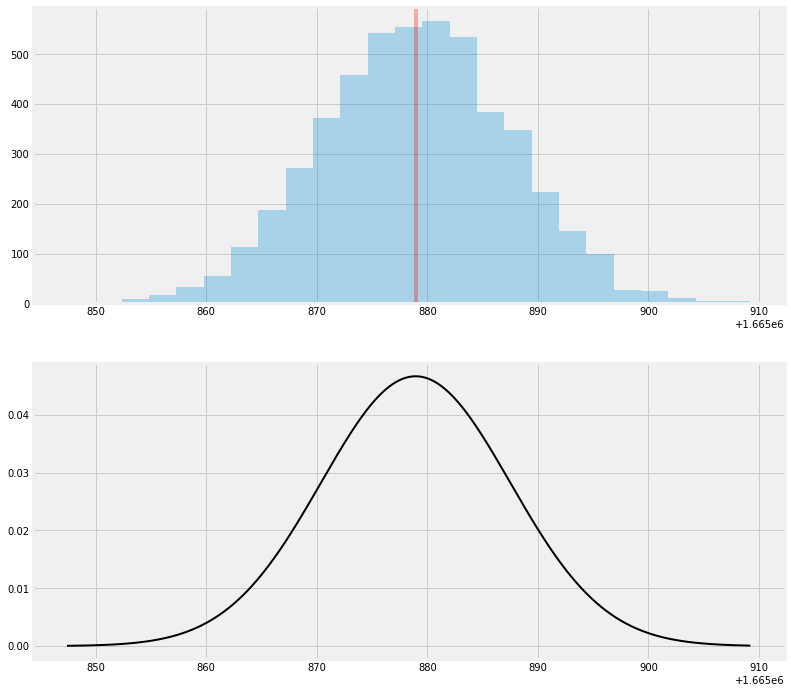

In [220]:
p =len(faster)/len(df)
n= len(df)

plot_means(scs.binom, {'n':n , 'p':p}, size = 10000)
plot_stds



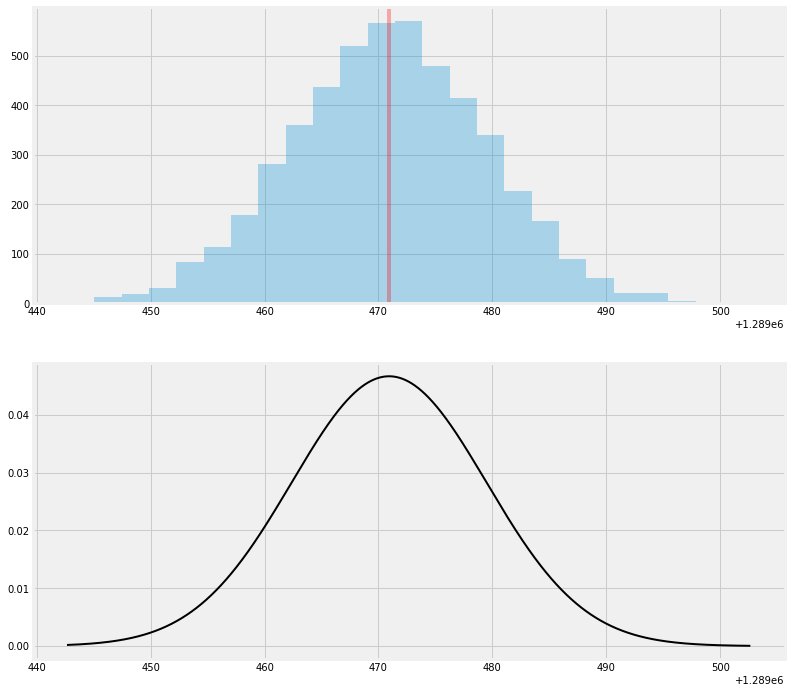

In [221]:
p=len(slower)/len(df)

plot_means(scs.binom, {'n':n , 'p':p}, size = 10000)
#plot_stds(scs.binom, {'n':n , 'p':p}, size = 10000)

In [311]:
np.mean(distance_faster)

2209.396900975401

In [312]:
np.mean(distance_slower)

2462.104984136906

In [4]:
# distance are greater for people who beat google estimate
# H0 = distances are the same
# HA = distances are different
# alpha = 0.05
#welech ttest to determine if velocites are the same

distance_faster= faster['bicycle_distance']
distance_slower= slower['bicycle_distance']
distance_mean = np.mean(df['velocity'])

fig, ax = plt.subplots(figsize=(12,12), facecolor ='white')
ax.hist(distance_faster, alpha = 0.3, bins = 100, color='blue', label = 'faster')
ax.hist(distance_slower, alpha = 0.3, bins = 100, color='red', label ='slower')

ax.legend()
plt.title("Distance of Rides Completed in Less Time Than Googles Estimate")

stat, p_val = scs.ttest_1samp(distance_faster,distance_mean)
print(f"T-Test 1sample faster vs overall average distance. Stat: {stat}, p-value: {p_val:2.3f}")
stat, p_val = scs.ttest_1samp(distance_slower,distance_mean)
print(f"T-Test 1sample slower vs overall average distance. Stat: {stat}, p-value: {p_val:2.3f}")


stat, p_val = scs.ttest_ind(distance_slower,distance_faster, equal_var = False)
print(f"T-Test two tails (slower v faster) stat: {stat}, p-value: {p_val:2.9f}")

NameError: name 'faster' is not defined

In [373]:
(np.mean(v_morning) - np.mean(v_evening))/np.mean(v_evening)

0.10341470192460242

In [38]:
len(v_morning)

869077

 TTest results ---- Stat: 251.15672876004845, P-value: 0.000
 Mannwhitneyu results ---- Stat: 541008141626.0, P-value: 0.000000000
Morning Commute ---- Mean: 8.807082143548248, Variance: 5.892328304056185, Standard Deviation: 2.4274118529940867
Evening Commute ---- Mean: 7.874665186948296, Variance: 7.124760600805622, Standard Deviation: 2.669224719053385


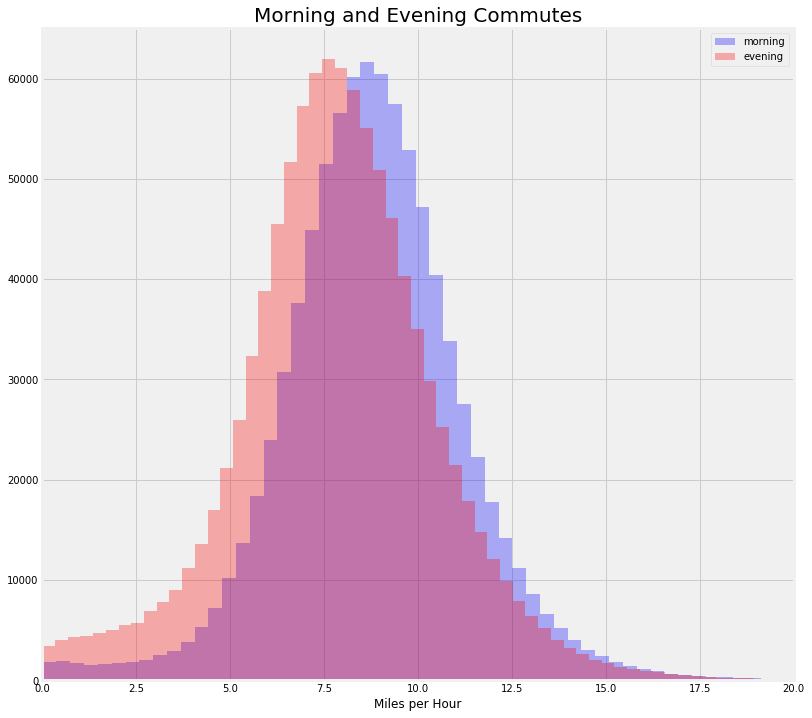

In [40]:
# people are faster during morning rush hour (6-10) than evening home (4-8pm)
# H0 velocites are the same
# HA velocites are different, faster in mornig
# alpha = 0.05

fig, ax = plt.subplots(figsize=(12,12), facecolor ="white")




v_morning = morning_commute['velocity']
v_evening = evening_commute['velocity']


ax.hist(v_morning, alpha = 0.3, bins = 100, color='blue', label = 'morning')
ax.hist(v_evening, alpha = 0.3, bins = 100, color='red', label ='evening')
ax.legend()
ax.set_xlabel("Miles per Hour")
ax.set_xlim(0,20)
plt.title("Morning and Evening Commutes", fontsize = 20)

stat, p_val = scs.ttest_ind(v_morning,v_evening, equal_var = False)
print(f" TTest results ---- Stat: {stat}, P-value: {p_val:2.3f}")


stat,p_val = scs.mannwhitneyu(v_morning,v_evening,alternative='greater', use_continuity= True)
print(f" Mannwhitneyu results ---- Stat: {stat}, P-value: {p_val:2.9f}")
print(f"Morning Commute ---- Mean: {np.mean(v_morning)}, Variance: {np.var(v_morning)}, Standard Deviation: {np.std(v_morning)}" )
print(f"Evening Commute ---- Mean: {np.mean(v_evening)}, Variance: {np.var(v_evening)}, Standard Deviation: {np.std(v_evening)}" )

fig.savefig("Morning_Evening")


In [315]:
df.head()

,bicycle_distance,bicycle_duration,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,...,station1,station2,transit_distance,transit_duration,hour,day,month,velocity,bicycle_duration_difference,bicycle_estimate_velocity
2477,1200,399,1544,27,37.788059,-122.391865,Beale St at Harrison St,2018-01-01 00:19:23.047,14,37.795001,...,14.0,27.0,3513.0,1685.0,23,Sunday,December,1.738556,1145,6.727645
2478,1200,399,1474,27,37.788059,-122.391865,Beale St at Harrison St,2018-01-01 00:19:14.351,14,37.795001,...,14.0,27.0,3513.0,1685.0,23,Sunday,December,1.821120,1075,6.727645
2479,1200,399,409,27,37.788059,-122.391865,Beale St at Harrison St,2017-12-29 14:42:58.102,14,37.795001,...,14.0,27.0,3513.0,1685.0,14,Friday,December,6.563155,10,6.727645
2480,1200,399,1151,27,37.788059,-122.391865,Beale St at Harrison St,2017-12-21 17:13:22.731,14,37.795001,...,14.0,27.0,3513.0,1685.0,16,Thursday,December,2.332172,752,6.727645
2481,1200,399,321,27,37.788059,-122.391865,Beale St at Harrison St,2017-12-18 15:55:08.514,14,37.795001,...,14.0,27.0,3513.0,1685.0,15,Monday,December,8.362399,-78,6.727645


(0, 36)

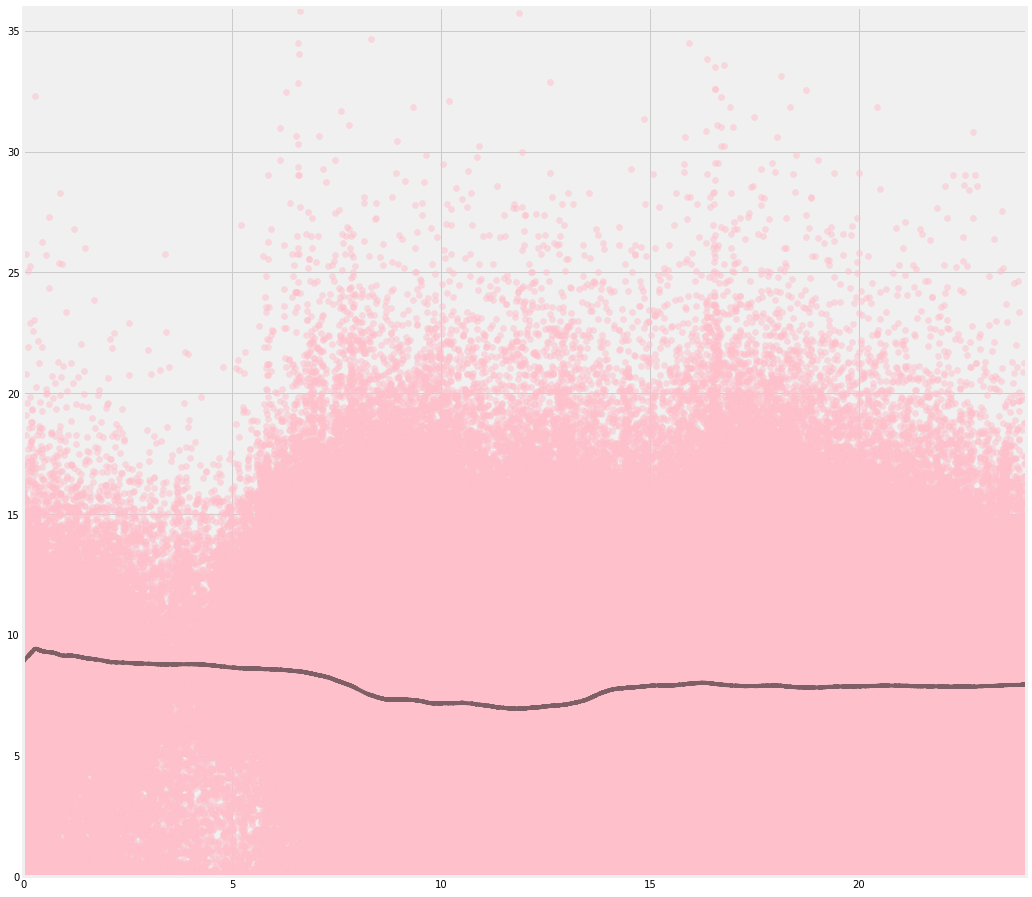

In [370]:
velocity = df['velocity']
hour = df['hour']

x = np.linspace(0,24,len(rolling))

fig, ax = plt.subplots(figsize=(16,16))

ax.scatter(hour, velocity, alpha =0.5, color='pink')
ax.plot(x, rolling.velocity, color ='black', alpha = 0.5)
ax.set_xlim(0,24)
ax.set_ylim(0,36)

In [367]:
rolling = df[['hour','velocity']].sort_values(by = 'hour').rolling(100000).mean().dropna()

In [365]:
rolling.velocity

1557785    7.846876
1132612    7.847400
1560113    7.847750
933378     7.847723
1536722    7.847622
             ...   
1079483    7.921643
753851     7.921690
1296873    7.922100
1433947    7.922124
946575     7.921704
Name: velocity, Length: 2953390, dtype: float64

-193.145370069288 0.0


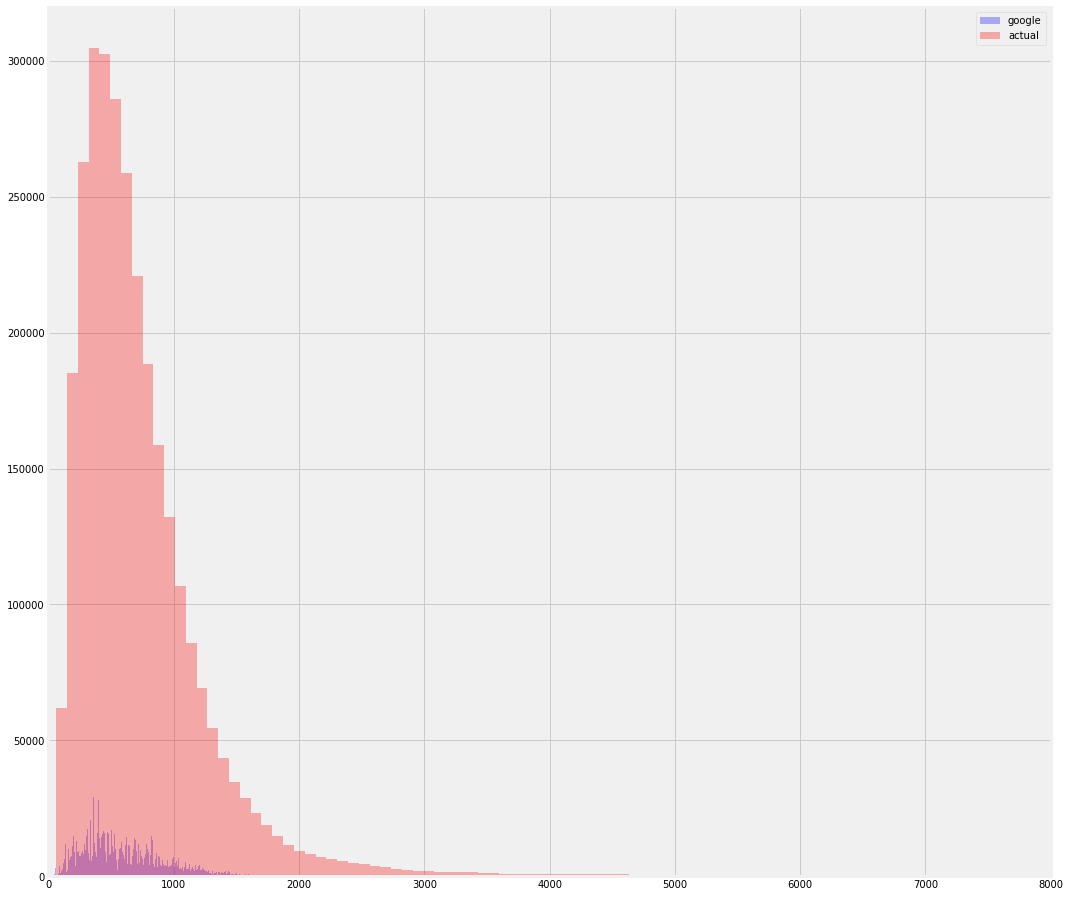

In [26]:
google = df['bicycle_duration']
actual = df['duration_sec']


fig,ax =plt.subplots(figsize=(16,16))
ax.hist(google, alpha = 0.3, bins = 1000, color='blue', label = 'google')
ax.hist(actual, alpha = 0.3, bins = 1000, color='red', label ='actual')
ax.set_xlim(0,8000)
ax.legend()

stat, p_val = scs.ttest_ind(google, actual, equal_var = False)

print(stat, p_val)